In [3]:
import numpy as np
import matplotlib.pyplot as plt


## Activity 1

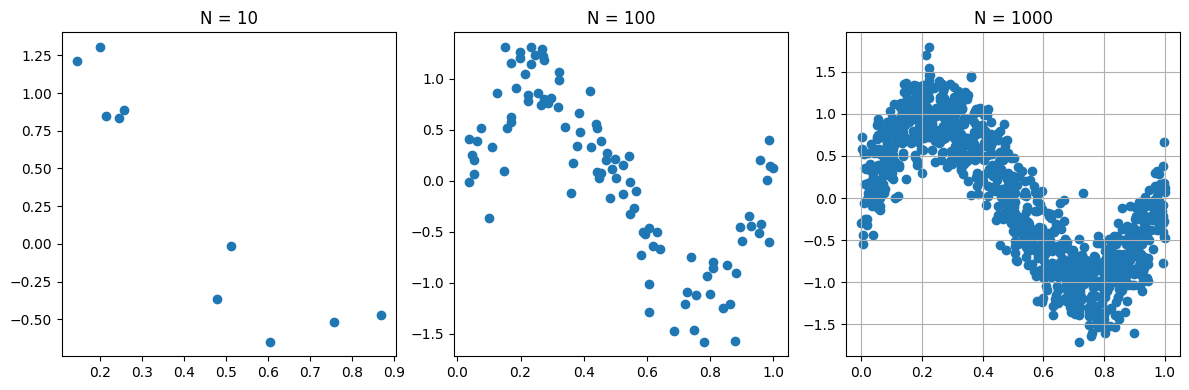

In [ ]:
nsamples = [10,100,1000]
plot, axes = plt.subplots(1,len(nsamples), figsize = (12,4))
for i, N in enumerate(nsamples):
    X = np.random.uniform(0,1,N)
    Y = np.sin(2*np.pi*X) + np.random.normal(loc=0,scale=0.3,size=N)
    axes[i].scatter(X,Y)
    axes[i].set_title('N = '+ str(N))
    plt.tight_layout()
    plt.grid()
#plt.savefig('act1a.png', dpi = 300)  

In [ ]:
class PolyFit():
    def __init__(self,degree,nsamples):
        self.M = degree
        self.N = nsamples
        self.x_samples = np.random.uniform(0,1,self.N)
        self.signal = np.sin(2*np.pi*self.x_samples)
        self.y_samples = self.signal + np.random.normal(loc=0,scale=0.3,
                                                        size = self.N)
    def fit_coeffs(self):
        return np.polyfit(self.x_samples, self.y_samples,self.M)
    def fit_poly(self):
        return np.poly1d(self.fit_coeffs())
    def plot(self):
        _x_vals = np.linspace(0,1,100)
        plt.plot(_x_vals, self.fit_poly()(_x_vals), 'r', label='Fit')
        plt.scatter(self.x_samples(), self.y_samples())
        plt.legend()
        plt.grid()
        plt.tight_layout()


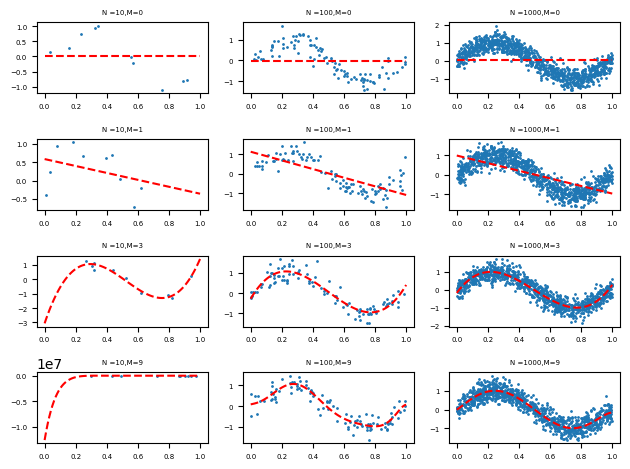

In [ ]:
degree = [0,1,3,9]
fig, axs = plt.subplots(len(degree),len(nsamples))

for i in range(len(degree)):
    for j in range(len(nsamples)):
        fit = PolyFit(degree[i],nsamples[j])
        t = np.linspace(0,1,100)
        axs[i,j].plot(t, fit.fit_poly()(t), 'r--')
        axs[i,j].scatter(fit.x_samples, fit.y_samples, s = 1)
        axs[i,j].set_title('N ='+ str(nsamples[j]) + ',M=' + str(degree[i]),
                           fontsize = 5)
        axs[i,j].xaxis.set_tick_params(labelsize=5)
        axs[i,j].yaxis.set_tick_params(labelsize=5)
fig.tight_layout()
#plt.savefig('act1b.png', dpi = 300)


In [92]:
def error_func(samples, coeffs, data):
    s=0
    for i in range(len(samples)):
        s += (np.poly1d(coeffs)(samples[i]) - data[i])**2
    return 0.5*s
def E_rms(samples, coeffs, data):
    return np.sqrt(2*error_func(samples, coeffs, data)/len(samples))

In [95]:
## For Polynomial of order 9 and 100 data points, the E_rms is given by
fit = PolyFit(9,100)
print('E_rms = ' , E_rms(fit.x_samples, fit.fit_coeffs(), fit.y_samples))

E_rms =  0.27599471201303055


## Activity 4


In [104]:
def phi(x):
    return np.array([x**i for i in range(9+1)]).reshape((9+1,1))

In [115]:
class BayesianFit():
    def __init__(self, x, x_samples, y_samples, degree, alpha, beta):
        self.x = x
        self.x_samples = x_samples
        self.y_samples = y_samples
        self.degree = degree
        self.alpha = alpha
        self.beta = beta
    def S(self):
        S_inv = self.alpha*np.identity(self.degree+1)
        for i in range(len(self.x_samples)):
            S_inv += np.dot(phi(self.x_samples[i]), phi(self.x_samples[i]).T)
        return np.linalg.inv(S_inv*self.beta)
    def m(self):
        phi_t = np.zeros((self.degree+1,1))
        for i in range(len(self.x_samples)):
            phi_t += np.dot(phi(self.x_samples[i]), self.y_samples[i])
        return self.beta*phi(self.x).T.dot(self.S()).dot(phi_t)
    def variance(self):
        return 1.0/self.beta + phi(self.x).T.dot(self.S()).dot(phi(self.x))

    

In [116]:
x_samples = np.random.uniform(0,1,100)
y_samples = np.sin(2*np.pi*x_samples) + np.random.normal(loc=0,scale=0.3,size=100)
x_range = np.linspace(0,1,100)
mean = np.array([BayesianFit(x,x_samples,y_samples,9,0.005,11.1).m() for x in x_range])
var = np.array([BayesianFit(x,x_samples,y_samples,9,0.005,11.1).variance() for x in x_range])
sd = np.sqrt(var)
upper_bound = mean+sd
lower_bound = mean-sd

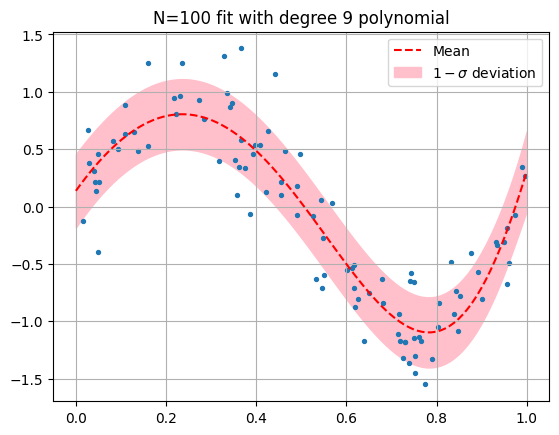

In [127]:

plt.plot(x_range,mean.flatten(), 'r--', label = 'Mean')
plt.fill_between(x_range, upper_bound.flatten(), lower_bound.flatten(),
                color ='pink',
                label = r'$1-\sigma$ deviation')
plt.scatter(x_samples,y_samples,s = 8)
plt.legend()
plt.title('N=100 fit with degree 9 polynomial')
plt.grid()
plt.tight_layout
plt.savefig('act4.png', dpi = 300)